In [2]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv('./trivago_data_analysis_case_study_part1.csv')
df = df.sort_values(by='item_id', ascending=True).reset_index(drop=True)
#df1 = round(df.groupby("item_id")['clicks']*100/df.groupby("item_id")['impressions'].sum() , 2)

df['CTR'] = round(df['clicks']*100/df['impressions'] , 2)
df

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,CTR
0,5001,27,2,7;5,5.52,8,10,7.41
1,5003,21,1,3,2.81,8,13,4.76
2,5009,6,2,1;1,8.67,2,3,33.33
3,5014,72,8,0;-11;-11;-11;3;-11;0;2,6.69,40,42,11.11
4,5015,76,4,1;5;1;0,6.25,44,45,5.26
...,...,...,...,...,...,...,...,...
130051,7174566,7,1,1,6.86,5,5,14.29
130052,7174614,4,1,5,11.50,4,4,25.00
130053,7174690,10,1,-11,15.50,7,7,10.00
130054,7174968,7,1,8,9.43,4,4,14.29


### Part 1 - Clicked Items Investigation

### 1. CTR of each item and overall average CTR

##### CTR of each item 

In [118]:
# CTR of each item 
df['CTR'] = round(df['clicks']*100/df['impressions'] , 2)
df

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,CTR
0,5001,27,2,7;5,5.52,8,10,7.41
1,5003,21,1,3,2.81,8,13,4.76
2,5009,6,2,1;1,8.67,2,3,33.33
3,5014,72,8,0;-11;-11;-11;3;-11;0;2,6.69,40,42,11.11
4,5015,76,4,1;5;1;0,6.25,44,45,5.26
...,...,...,...,...,...,...,...,...
130051,7174566,7,1,1,6.86,5,5,14.29
130052,7174614,4,1,5,11.50,4,4,25.00
130053,7174690,10,1,-11,15.50,7,7,10.00
130054,7174968,7,1,8,9.43,4,4,14.29


#### Overall average CTR is 11.45

In [119]:
# Overall average CTR

df.CTR.mean()

11.455641646675604

In [120]:
#to verify unique values in item_id

df.item_id.value_counts().mean()

1.0

In [121]:
df1 = df.sort_values(by='clicks', ascending=False).reset_index(drop=True)
df1

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,CTR
0,2834772,14781,2865,0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;-11;0;0;0;0;...,4.42,9706,11143,19.38
1,1321090,38569,2764,7;0;-11;8;7;2;0;1;-11;1;0;10;6;0;2;0;1;0;1;0;0...,6.75,22576,25987,7.17
2,12624,18519,2543,0;1;1;0;-11;2;0;0;0;1;0;2;-11;1;0;0;1;1;0;1;0;...,2.20,10265,12265,13.73
3,1455251,3409,2282,0;0;3;-11;0;2;0;0;-11;0;0;0;0;0;0;0;0;0;0;0;0;...,1.67,2777,2986,66.94
4,32940,11608,2252,0;0;0;1;0;0;-11;4;0;-11;3;1;0;-11;0;-11;0;-11;...,3.30,7697,8704,19.40
...,...,...,...,...,...,...,...,...
130051,1785685,21,1,0,8.48,15,15,4.76
130052,1785733,2,1,2,2.00,1,1,50.00
130053,1785753,6,1,13,8.33,3,5,16.67
130054,1785857,10,1,8,10.80,6,6,10.00


### Part 1 
### 2. Distribution of Clicks, Share of first positions, Number of positions on which half of the click outs are made

#### Distribution of clicks

In [122]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clicks', ylabel='Density'>

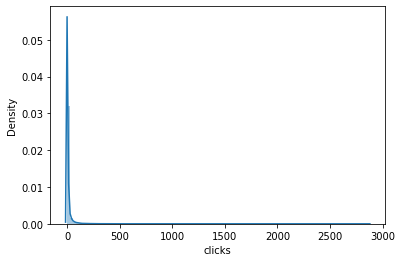

In [123]:
sns.distplot(df1.clicks, bins=100)

#### Share of first positions is 0.15 %

In [124]:
df2 = df1[df1.avg_impressed_position == 0]
share_of_first_positions = sum(df2.clicks) * 100 / sum(df1.clicks)
print('Share of the first positions is : ',' ',round(share_of_first_positions,3),'%')

Share of the first positions is :    0.155 %


In [125]:
df.dtypes

item_id                          int64
impressions                      int64
clicks                           int64
clicked_displayed_positions     object
avg_impressed_position         float64
num_users                        int64
num_sessions                     int64
CTR                            float64
dtype: object

In [1]:
# val = np.flatnonzero(np.isclose(df1.clicks.cumsum().values, sum(df1.clicks)/2, atol=1))[1]
# val

#### Number of positions on which half of the click outs are made

In [129]:
position_till_halfofclickouts = np.flatnonzero(np.isclose(df1.clicks.cumsum().values, sum(df1.clicks)/2, atol=2))[0]
position_till_halfofclickouts

4135

In [132]:
df1['avg_impressed_position'].iloc[0:position_till_halfofclickouts + 1].mean()


9.71692456479692

##### Thus, on approx first 10 positions out of 25 positions , half of the click outs are made

### Part 1 
### 3.  Relationship between the average displayed position and the clicked displayed position, finding variance between them

In [133]:
df1['avg_clicked_positions'] = np.nan
df1

,item_id,impressions,clicks,clicked_displayed_positions,avg_impressed_position,num_users,num_sessions,CTR,avg_clicked_positions
0,2834772,14781,2865,0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;-11;0;0;0;0;...,4.42,9706,11143,19.38,NaN
1,1321090,38569,2764,7;0;-11;8;7;2;0;1;-11;1;0;10;6;0;2;0;1;0;1;0;0...,6.75,22576,25987,7.17,NaN
2,12624,18519,2543,0;1;1;0;-11;2;0;0;0;1;0;2;-11;1;0;0;1;1;0;1;0;...,2.20,10265,12265,13.73,NaN
3,1455251,3409,2282,0;0;3;-11;0;2;0;0;-11;0;0;0;0;0;0;0;0;0;0;0;0;...,1.67,2777,2986,66.94,NaN
4,32940,11608,2252,0;0;0;1;0;0;-11;4;0;-11;3;1;0;-11;0;-11;0;-11;...,3.30,7697,8704,19.40,NaN
...,...,...,...,...,...,...,...,...,...
130051,1785685,21,1,0,8.48,15,15,4.76,NaN
130052,1785733,2,1,2,2.00,1,1,50.00,NaN
130053,1785753,6,1,13,8.33,3,5,16.67,NaN
130054,1785857,10,1,8,10.80,6,6,10.00,NaN


In [134]:
len(df1)

130056

In [135]:
## SPlitting the clicked display positions and calculating the average for each item id as average clicked position

from statistics import mean
for i in range(0, len(df1)):
    lst1 = df1.clicked_displayed_positions.iloc[i].split(';')
    lst2 = [x+1 for x in list(map(int, lst1))]
    df1.avg_clicked_positions[i] = mean(lst2)

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [136]:
len(df1.clicked_displayed_positions.iloc[0])

6191

#### Relationship between average display positions and average clicked position

In [137]:
df1['avg_impressed_position'].corr(df1['avg_clicked_positions'], method='pearson') 
#represents moderate positive correlation as the value is between 0.3 to 0.5 

0.44693685061779764

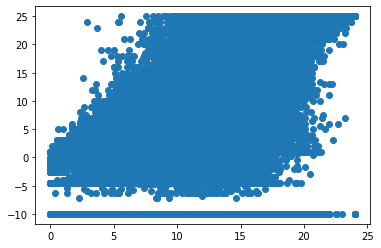

In [151]:
pyplot.scatter(df1.avg_impressed_position, df1.avg_clicked_positions)

#### The above obtained correlation value represents 'moderate positive' relationship between the two entities as the value lies between 0.3 to 0.5. Such values are generally not considered significant for statistical analysis.

In [138]:
from numpy import cov
cov(df1.avg_impressed_position, df1.avg_clicked_positions)

array([[16.69804674, 11.41251379],
       [11.41251379, 39.04852459]])

#### The above value of covariance between the two columns is positive(11.41) which tells us that both the variables increase and decrease in the same direction i.e. the relationship between the two entities is positive. However the covariance value does not give the measure of strength of positive relationship between the two variables. 

### Part 1 
### 4.  Problem with using the avg displayed position is using average value. 
### Average value is influenced by the outliers. Suppose the frequency of the top positions is more and there is one position in the list which is the lowest position. This might shift the average from near the top positions towards the lower positions. This gives a false impression of the average position at which the ad was displayed maximum number of times. 
### Also as it is evident from the previous obtained value of correlation or covariance, the average displayed position does not seem to help much in further statistical analysis of the data. 

In [6]:
# trivago_data_analysis_case_study_part2.csv

### Part 2 - Session Investigation

In [140]:
df2 = pd.read_csv('./trivago_data_analysis_case_study_part2.csv')
df2

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
0,6216730024127027591,3.755630e+18,3390592.0,-11.0,0.0,12.0,2113.0,39693.0,3.0,4.0,2.0,128992;127920;132177;1107164;19389;3217646;123...
1,3540322805835307689,4.581411e+18,2393900.0,6.0,0.0,21.0,2113.0,35009.0,21.0,22.0,2.0,5169438;997421;76994;1376364;67654;68977;23939...
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
3,3482625725900275142,3.013037e+18,148308.0,6.0,0.0,41.0,2113.0,41579.0,39.0,42.0,3.0,2196706;46431;1262783;148312;1478421;6171546;1...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...
...,...,...,...,...,...,...,...,...,...,...,...,...
1903791,5028541436110079997,3.871249e+18,774608.0,9.0,0.0,12.0,2111.0,42061.0,5.0,6.0,3.0,2087272;1060370;2022423;6452248;2140740;397412...
1903792,6831980148118640914,4.236341e+18,48092.0,4.0,0.0,312.0,2116.0,39415.0,16.0,17.0,2.0,552846;534306;313646;540266;48092;2400618;4763...
1903793,2454249563692940844,8.505449e+18,1180076.0,2.0,9.0,21.0,2111.0,94375.0,0.0,1.0,2.0,1187380;342656;1180076;3152281;1140535;1858181...
1903794,4595408214836674765,4.602187e+18,20046.0,19.0,0.0,12.0,2113.0,94718.0,21.0,24.0,2.0,19887;83946;20135;20107;916101;19933;19911;336...


In [141]:
df2 = df2.dropna()
df2.isnull().any()

user_id                False
session_id             False
clicked_item_id        False
displayed_position     False
page_num               False
sort_order             False
search_type            False
path_id                False
arrival_days           False
departure_days         False
traffic_type           False
impressed_item_ids     False
dtype: bool

In [163]:
df2['user_id'] = pd.to_numeric(df2['user_id'])

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
df2['traffic_type'] = pd.to_numeric(df2['traffic_type'])

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Part 2
### 1. Describing the dataset, finding 5 most frequent values per column (with frequency) and finding any suspicious results in them

### Dataset description:
#### Dataset contains 1.9 million records.  
#### User_id: Each row represents the clicked information of users. Each user_id represents unique user. Dataset contains repeated records of every user. Records of '4509866267912745159' user occur the most. 
#### Session_id: Represents id of the sessions assigned to each user.
#### Clicked_item_id: Represents the unique hotel Id. '2834772' seems to be the popular hotel with most clicks.
#### displayed_position: Represents the position of the hotel on the list. First position(0) seems to be repeated the most which means users click on the first position frequently.
#### page_num: Represents the page number of the item on which the user has clicked. Statistics shows that the first five pages have the maximum visits from users i.e. about 98.7% of the total clicks.
#### sort_order: Its a categorical variable. Sort_order = 12 seems to be the most popular one among the users.
#### search_type: Its a categorical variable. Search_type=2113 seems to be the popular one.
#### path_id: Represents the location of the hotel. '38715' location seems to be the most popular one among the users.
#### arrival_days: Represents the number of days from the day of search until check in date. On an average users search for the hotels 57 days in advance.
#### departure_days: Represents the number of days from the day of search until the check out date. 
#### traffic_type: Its a categorical variable. traffic_type = 2 is the most used way by the users to access the trivago website.
#### impressed_items_id: Represents the list of all other items that were displayed along with clicked_item_id. 

In [164]:
df2.describe()

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type
count,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06,1.903795e+06
mean,4.608092e+18,4.599321e+18,1.151328e+06,4.255730e+00,2.710922e-01,1.031139e+02,2.113646e+03,8.224041e+04,5.741450e+01,-2.753361e+04,2.103141e+00
std,2.664320e+18,2.662867e+18,1.487240e+06,7.724735e+00,1.097410e+00,1.342582e+02,1.530549e+00,1.241438e+05,7.034603e+01,1.638114e+05,4.508134e-01
min,4.089034e+13,4.368929e+12,5.001000e+03,-1.100000e+01,0.000000e+00,0.000000e+00,2.100000e+03,0.000000e+00,-1.000000e+00,-1.000000e+06,1.000000e+00
25%,2.294399e+18,2.294853e+18,4.708000e+04,0.000000e+00,0.000000e+00,1.200000e+01,2.113000e+03,3.800900e+04,9.000000e+00,1.000000e+01,2.000000e+00
50%,4.605501e+18,4.593670e+18,4.810160e+05,2.000000e+00,0.000000e+00,1.200000e+01,2.113000e+03,4.060600e+04,2.700000e+01,2.700000e+01,2.000000e+00
75%,6.908918e+18,6.905452e+18,1.822887e+06,8.000000e+00,0.000000e+00,2.120000e+02,2.115000e+03,4.681400e+04,8.400000e+01,8.500000e+01,2.000000e+00
max,9.223340e+18,9.223365e+18,7.174984e+06,2.400000e+01,2.000000e+01,4.210000e+02,2.116000e+03,6.804240e+05,7.300000e+02,7.420000e+02,3.000000e+00


In [168]:
df2.page_num.value_counts().head(5).sum() / df2.page_num.value_counts().sum()

0.9870605816277488

In [172]:
df2.traffic_type.value_counts()

2.0    1496629
3.0     301763
1.0     105403
Name: traffic_type, dtype: int64

#### Finding 5 most frequent values per column

In [143]:
# get top 5 most frequent names
n = 5
df2['user_id'].value_counts()[:5]

4509866267912745159    549
3212529366726084995    373
9051529085815567256    332
8844433817516149751    272
6297403635493453063    219
Name: user_id, dtype: int64

In [174]:
for i in df2.columns:
    print("\n Top 5 frequent values of column ",i,"and their count is \n" )
    print(df2[i].value_counts().head(5))


 Top 5 frequent values of column  user_id and their count is 

4509866267912745159    549
3212529366726084995    374
9051529085815567256    335
8844433817516149751    272
6297403635493453063    219
Name: user_id, dtype: int64

 Top 5 frequent values of column  session_id and their count is 

5.009065e+18    337
8.560570e+18    148
2.839951e+18    109
7.154740e+18     92
3.191225e+18     88
Name: session_id, dtype: int64

 Top 5 frequent values of column  clicked_item_id and their count is 

2834772.0    2869
1321090.0    2828
12624.0      2575
32940.0      2324
1455251.0    2297
Name: clicked_item_id, dtype: int64

 Top 5 frequent values of column  displayed_position and their count is 

 0.0     495014
 1.0     203090
-11.0    152437
 2.0     138789
 3.0     108490
Name: displayed_position, dtype: int64

 Top 5 frequent values of column  page_num and their count is 

0.0    1677391
1.0     124109
2.0      44578
3.0      21226
4.0      11857
Name: page_num, dtype: int64

 Top 5 freque

### Part-2  Suspicious results and corresponding fixes for further analysis
#### 1.  If we look at the top 5 frequent values of the column departure_days then you can see the abnormal value of -1000000 days. This is abnormal because first of all, this value is expected to be higher than arrival_days and number of days cannot be negative from the day of search. So to fix these values, we can replace them with the following  method:

####  Find the average stay of individual "clicked_item_id" in the main data set obtained by omitting records with "departure_days" as -1000000 days. Average stay can be calculated by subtracting the departure_days and arrival_days. Then increase the corresponding "arrival_days" for all those particular "clicked_item_id" which have departure_days as -100000 by the average stay calculated and record it as "departure_days". 

#### Also in the displayed_position column, we see that the -11 position is among the top 5 frequent values. This value can be replaced by '14' as -11 represents 14th position as per list principle 
##### or
#### We can calculate the average display position for each clicked_item_id having -11 position from the dataset and replace -11 with the rounded average displayed position value.


### Part 2
### 2. Which search type has the lowest average displayed position? What is the best sorting order for this search type? Which search type should be excluded for a statistical reason?

In [145]:
## Preparing a dictionary for each search_type and its corresponding average displayed position
avg_disp_lst = dict(df2.groupby('search_type')['displayed_position'].mean())

In [146]:
# min(avg_clicked_lst, key=avg_clicked_lst.get)
min(avg_disp_lst.items(), key=lambda x: x[1])

(2116.0, 1.372423671997934)

#### Thus, search_type = 2116 has the lowest average display position

In [10]:
#which search_type has the lowest avg clicked value(key, value)
min_searchtype = min(avg_disp_lst.items(), key=lambda x: x[1])[0]

In [11]:
df3 = df2[df2['search_type']==min_searchtype]
df3

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...
5,8400792661852651256,7.163416e+18,2378550.0,0.0,0.0,212.0,2116.0,382.0,6.0,7.0,1.0,2378550;2266990;1247594;4595264;2402454;477300...
7,1108080265867879700,6.163484e+18,131724.0,0.0,0.0,12.0,2116.0,50919.0,130.0,140.0,3.0,131724;1017138;39612;624571;2643984;2789918;98...
27,3326420326808079376,4.865805e+18,4001214.0,9.0,0.0,312.0,2116.0,490289.0,0.0,1.0,2.0,2550972;2048553;1146671;2546928;633186;3390554...
...,...,...,...,...,...,...,...,...,...,...,...,...
1903777,3449295481386478297,2.441366e+18,1552521.0,1.0,0.0,312.0,2116.0,74939.0,24.0,25.0,2.0,94879;1552521;128063;4009562;3135158;4906436;4...
1903779,1832040571206722657,3.721955e+18,13815.0,0.0,0.0,12.0,2116.0,31654.0,85.0,92.0,3.0,13815;9612;96090;948415;1331518;38044;37949;91...
1903780,7890336084179973334,9.054339e+17,12480.0,0.0,0.0,12.0,2116.0,42454.0,243.0,244.0,2.0,12480;1345912;12455;46102;16674;12451;3196054;...
1903790,6238632187042539475,5.583108e+16,6955.0,17.0,0.0,12.0,2116.0,31718.0,194.0,195.0,2.0,37324;85304;95508;581461;974163;37323;136071;5...


In [12]:
avg_sort_lst = dict(df3.groupby('sort_order')['displayed_position'].mean())

In [13]:
avg_sort_lst

{0.0: 7.545454545454546,
 12.0: 1.232831422718942,
 21.0: 2.142704044221332,
 32.0: 5.098214285714286,
 41.0: 5.320428826682549,
 112.0: 4.995951417004049,
 212.0: 5.224325412807088,
 312.0: 0.7984770702326525,
 412.0: 5.613883299798792}

#### Best sort order for search type having lowest average display position (search_type =2116)

In [14]:
best_sortorder = min(avg_sort_lst.items(), key=lambda x: x[1])[0]
best_sortorder

312.0

#### Thus, 312 sort order is the best sort order for search_type = 2116 because 312 has the lowest average display position for 2116 search_type

In [15]:
search_type_to_be_excluded = max(avg_disp_lst.items(), key=lambda x: x[1])[0]

In [16]:
search_type_to_be_excluded

2111.0

#### Thus, 2111 search_type is best to be excluded from statistical pov because it has the maximum average display position 

### Part 2
### 3. Finding the top 1000 clicked items and finding relationship between their CTR and average display position

In [147]:
top_1000_clicked = dict(df2.clicked_item_id.value_counts().head(1000))

In [148]:
top_1000_clicked_lst = list(top_1000_clicked.keys())

#### Top 1000 clicked items

In [149]:
top_1000_clicked_lst

[2834772.0,
 1321090.0,
 12624.0,
 32940.0,
 1455251.0,
 12594.0,
 4293266.0,
 18489.0,
 12522.0,
 151146.0,
 85808.0,
 85725.0,
 19599.0,
 1535477.0,
 1700399.0,
 18802.0,
 672466.0,
 12634.0,
 18804.0,
 13123.0,
 8928.0,
 436036.0,
 85116.0,
 2055010.0,
 19607.0,
 19768.0,
 37165.0,
 12695.0,
 47121.0,
 19004.0,
 2707162.0,
 46833.0,
 19046.0,
 148968.0,
 149129.0,
 12614.0,
 1299521.0,
 19648.0,
 38365.0,
 934069.0,
 85724.0,
 6977.0,
 1394139.0,
 18465.0,
 12399.0,
 19539.0,
 46510.0,
 46296.0,
 42084.0,
 12361.0,
 46471.0,
 1811137.0,
 894539.0,
 46314.0,
 1364710.0,
 117840.0,
 3953294.0,
 4415118.0,
 12694.0,
 1836059.0,
 3842698.0,
 2195678.0,
 3367950.0,
 1345912.0,
 2289832.0,
 12630.0,
 18988.0,
 152930.0,
 1330971.0,
 12387.0,
 42166.0,
 18942.0,
 2727852.0,
 12363.0,
 12521.0,
 1751223.0,
 1533473.0,
 342836.0,
 18428.0,
 109839.0,
 85801.0,
 1153462.0,
 153010.0,
 148313.0,
 12618.0,
 18520.0,
 435981.0,
 1094726.0,
 2703102.0,
 19006.0,
 633541.0,
 11316.0,
 945135.0,
 4

In [150]:
### Filtering out the dataset with top 1000 clicked items
df4 = df2.loc[df2.clicked_item_id.isin(top_1000_clicked_lst)]
df4

,user_id,session_id,clicked_item_id,displayed_position,page_num,sort_order,search_type,path_id,arrival_days,departure_days,traffic_type,impressed_item_ids
2,5439210126639293380,7.260244e+18,8285.0,0.0,0.0,12.0,2116.0,34390.0,301.0,302.0,2.0,8285;8284;78562;8243;1288434;61564;60293;15334...
4,6185636196804664137,1.463579e+18,4527530.0,0.0,0.0,12.0,2116.0,85724.0,48.0,49.0,2.0,4527530;149339;945921;1236133;1259540;1700445;...
6,5413625771003376865,5.231116e+18,8589.0,19.0,0.0,21.0,2114.0,34741.0,207.0,210.0,2.0,8599;1810141;8551;8543;8549;8550;8518;1258697;...
10,789558363898056898,1.591826e+18,1094726.0,0.0,0.0,212.0,2111.0,31909.0,0.0,1.0,3.0,1094726;94743;94205;95392;15984;7361;6975;8206...
12,6069568714592593513,2.800709e+18,42133.0,0.0,0.0,12.0,2113.0,46814.0,124.0,129.0,3.0,42133;17779;2423428;107192;15460;105990;464683...
...,...,...,...,...,...,...,...,...,...,...,...,...
1903768,1631858228134039014,8.797815e+18,12695.0,17.0,0.0,412.0,2113.0,38715.0,28.0,29.0,2.0,12715;1321090;12653;880913;12701;18465;1535559...
1903771,2847380831110049181,3.898844e+17,706646.0,21.0,0.0,12.0,2113.0,38950.0,4.0,5.0,2.0,2707162;1535477;1320620;12618;12620;3252506;18...
1903778,3647726931679654564,7.119114e+18,126926.0,2.0,0.0,12.0,2113.0,31965.0,6.0,7.0,2.0,40499;1711119;126926;6743;6768;6775;147504;677...
1903785,671642138350467236,9.206485e+18,48011.0,2.0,0.0,12.0,2113.0,38715.0,86.0,88.0,2.0,47101;149129;48011;2726946;47181;1237696;46574...


In [60]:
## Finding number of clicks for each item id

clicks_df = df4.clicked_item_id.value_counts().reset_index()
clicks_df.columns = ['clicked_item_id', 'clicks']
clicks_df = clicks_df.sort_values(by='clicked_item_id', ascending=True).reset_index(drop=True)
clicks_df

,clicked_item_id,clicks
0,5563.0,250
1,5742.0,369
2,6743.0,254
3,6753.0,282
4,6768.0,623
...,...,...
995,5209538.0,486
996,5592002.0,334
997,5599748.0,823
998,6692704.0,250


In [61]:
## Finding average displayed position for each item id
avg_disp_position_df = df4.groupby('clicked_item_id', as_index=False)['displayed_position'].mean()
avg_disp_position_df

,clicked_item_id,displayed_position
0,5563.0,1.580000
1,5742.0,1.262873
2,6743.0,4.181102
3,6753.0,3.865248
4,6768.0,1.385233
...,...,...
995,5209538.0,4.296296
996,5592002.0,1.658683
997,5599748.0,2.509113
998,6692704.0,4.492000


In [24]:
df2['impressed_item_ids']=df2['impressed_item_ids ']

C:\Users\ashishkannur91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df2.columns

Index(['user_id', 'session_id', 'clicked_item_id', 'displayed_position',
       'page_num', 'sort_order', 'search_type', 'path_id', 'arrival_days',
       'departure_days', 'traffic_type', 'impressed_item_ids ',
       'impressed_item_ids'],
      dtype='object')

In [26]:
len(list(df2.impressed_item_ids))
lst_of_impressed_ids = list(df2.impressed_item_ids)

In [27]:
## Preparing a list of all impressed Ids by splitting the impressed_item_ids column
new_lst_of_impressed_ids = []
for i in lst_of_impressed_ids:
    new_lst_of_impressed_ids.append(i.split(";"))

In [28]:
from pandas.core.common import flatten
new_lst_of_impressed_ids1 = list(flatten(new_lst_of_impressed_ids))

In [30]:
len(new_lst_of_impressed_ids1)

43783426

In [33]:
#Preparing dictionary for each item id and number of impressions of each item id.
from collections import Counter

impressions_dict = Counter(new_lst_of_impressed_ids1)

In [43]:
#Creating impressions dataframe

impressions_df = pd.DataFrame(list(impressions_dict.items()),columns = ['clicked_item_id','impressions']) 

In [86]:
#changing the data type to integer for sorting
impressions_df['clicked_item_id'] = pd.to_numeric(impressions_df['clicked_item_id'])

In [88]:
## sorting the item ids in ascending order
impressions_df.sort_values(by='clicked_item_id', ascending=True).reset_index(drop=True)

,clicked_item_id,impressions
0,5001,27
1,5002,5
2,5003,21
3,5004,2
4,5006,4
...,...,...
441854,7175124,2
441855,7175136,12
441856,7176356,5
441857,7176638,2


In [100]:
## FIltering only the top 1000 frequent items calculated previously from above dataframe
impressions_df1 = impressions_df.loc[impressions_df.clicked_item_id.isin(list(clicks_df.clicked_item_id))]
impressions_df1 = impressions_df1.sort_values(by='clicked_item_id',ascending=True).reset_index(drop=True)
impressions_df1

,clicked_item_id,impressions
0,5563,3040
1,5742,2976
2,6743,4708
3,6753,6676
4,6768,7466
...,...,...
995,5209538,16457
996,5592002,5807
997,5599748,15345
998,6692704,2988


In [105]:
## Merging the clicks dataframe, average displayed position dataframe and number of impressions data frame into single dataframe
final_ctr_df =  pd.concat([clicks_df,avg_disp_position_df.displayed_position,impressions_df1.impressions], axis=1)
final_ctr_df

,clicked_item_id,clicks,displayed_position,impressions
0,5563.0,250,1.580000,3040
1,5742.0,369,1.262873,2976
2,6743.0,254,4.181102,4708
3,6753.0,282,3.865248,6676
4,6768.0,623,1.385233,7466
...,...,...,...,...
995,5209538.0,486,4.296296,16457
996,5592002.0,334,1.658683,5807
997,5599748.0,823,2.509113,15345
998,6692704.0,250,4.492000,2988


In [107]:
## FInding CTR for the top 1000 clicked items
final_ctr_df['CTR'] = final_ctr_df.clicks*100 / final_ctr_df.impressions
final_ctr_df

,clicked_item_id,clicks,displayed_position,impressions,CTR
0,5563.0,250,1.580000,3040,8.223684
1,5742.0,369,1.262873,2976,12.399194
2,6743.0,254,4.181102,4708,5.395072
3,6753.0,282,3.865248,6676,4.224086
4,6768.0,623,1.385233,7466,8.344495
...,...,...,...,...,...
995,5209538.0,486,4.296296,16457,2.953151
996,5592002.0,334,1.658683,5807,5.751679
997,5599748.0,823,2.509113,15345,5.363311
998,6692704.0,250,4.492000,2988,8.366801


In [109]:
final_ctr_df['CTR'].corr(final_ctr_df['displayed_position'])

-0.45700969797534013

#### Visualizing the relationship between CTR and displayed position

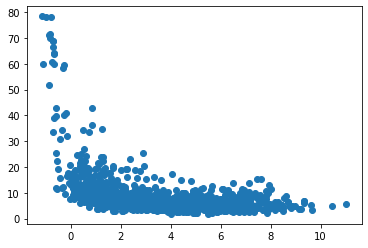

In [112]:
from matplotlib import pyplot
pyplot.scatter(final_ctr_df.displayed_position, final_ctr_df.CTR)
pyplot.show()

#### Finding the Relationship between average displayed position and CTR of the top 1000 clicked items

In [114]:
from numpy import cov
cov(final_ctr_df.displayed_position, final_ctr_df.CTR) ##Negative value indicates that variables increase in the opposite directions

array([[  5.84952668, -10.30945479],
       [-10.30945479,  86.99611099]])

#### Negative value of covariance(-10.30) indicates that variables increase in the opposite directions

In [173]:
from scipy.stats import pearsonr
pearsonr(final_ctr_df.displayed_position, final_ctr_df.CTR) ##Value between -0.30 to -0.49 indicates weak negative linear correlation

(-0.4570096979753403, 9.326399090293188e-53)

#### Pearson correlation coefficient  value(-0.45) is between -0.30 to -0.49  and hence indicates weak negative linear correlation which means that if average display position increases, then the CTR decreases.